In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astroML.correlation import bootstrap_two_point_angular

In [8]:
df=pd.read_csv('blanco.txt',delimiter=' ')
df=df[((df['r-mag']>17) & (df['r-mag']<20) & (df['spread_model']>0.002))]
df

,#RA,DEC,r-mag,spread_model,spread_model_err
16,77.039696,-56.084904,19.9448,0.008856,0.000064
38,77.119270,-56.108150,19.6127,0.006623,-0.000183
43,76.676086,-56.106075,18.8138,0.002451,0.000430
151,77.118393,-56.084389,19.7339,0.009028,0.020733
153,76.823029,-56.082844,19.8468,1.937630,0.019814
...,...,...,...,...,...
49924,77.387482,-53.855377,19.8971,0.010697,-0.000017
49935,76.962509,-53.848270,19.8635,0.003855,-0.001900
49962,77.199036,-53.847679,19.6593,4.073760,0.017146
49969,77.251816,-53.856327,18.7764,0.435740,0.023601


In [16]:
def compute_results(Nbins=16, Nbootstraps=10,  method='landy-szalay'):
    
    bins = 10 ** np.linspace(np.log10(1 / 60.), np.log10(1), 16)

    results = [bins]
    results += bootstrap_two_point_angular(df['#RA'],
                                               df['DEC'],
                                               bins=bins,
                                               method=method,
                                               Nbootstraps=Nbootstraps)

    return results

(bins, corr, corr_err, bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])

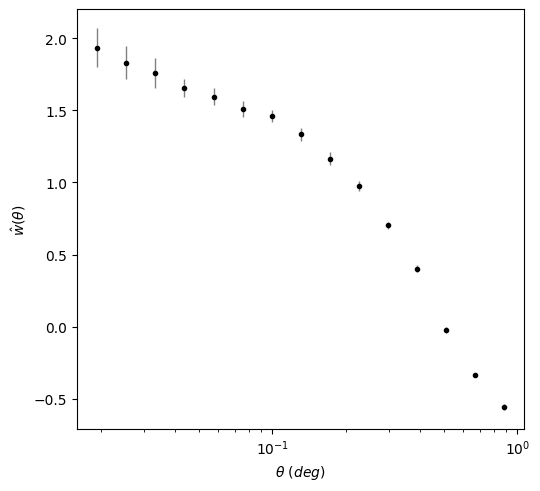

In [23]:
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.2, top=0.9,left=0.13, right=0.95)
ax = fig.add_subplot(121, xscale='log')
ax.errorbar(bin_centers, corr, corr_err,fmt='.k', ecolor='gray', lw=1)
ax.set_xlabel(r'$\theta\ (deg)$')
ax.set_ylabel(r'$\hat{w}(\theta)$')
plt.show()